In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

### Loading the dataset

In [7]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('gld_price_data.csv')

In [8]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [9]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [10]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [11]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [12]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [13]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [14]:
correlation = gold_data.corr()

<AxesSubplot:>

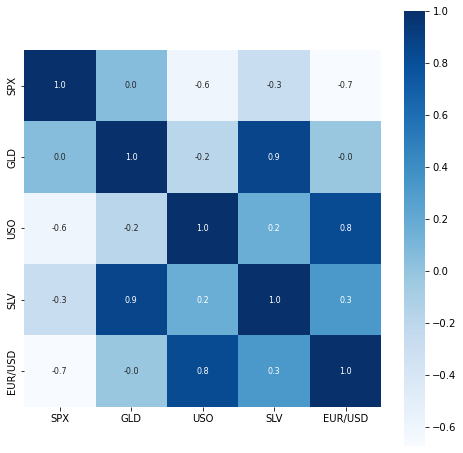

In [15]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [16]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


c:\Users\mohsi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

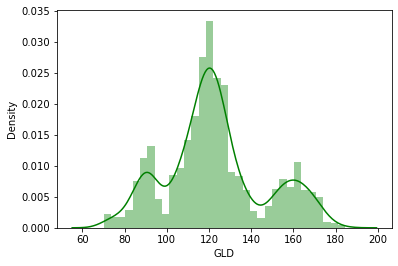

In [17]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

In [18]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [19]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [24]:
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [25]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [26]:
print(test_data_prediction)

[168.74079946  82.24059968 115.86410014 127.58070068 120.56790131
 154.81419811 150.63289864 126.24890028 117.42039877 125.97260109
 116.46560122 172.27720064 142.42959856 167.86229839 115.08990004
 117.87410031 138.46830292 170.24640079 159.14950276 156.55809983
 155.06630014 125.70530014 175.55639977 156.58110339 125.13410069
  93.73109951  77.28660013 120.99670001 118.95509887 167.67329956
  88.21260035 125.29990027  90.93590059 117.53519998 121.15489867
 136.58870065 115.78020135 115.02440104 145.71309983 107.034301
 104.4935025   87.14069804 126.40630047 117.71060002 153.93889939
 119.72479996 108.38689993 108.16629807  93.03960051 127.13089793
  75.47730021 113.63669959 121.07600005 111.18859918 118.79889881
 120.57659939 159.46110055 167.47930129 147.02269652  85.78689872
  94.51730016  86.86279909  90.71330007 119.02190071 126.42650083
 127.54330005 169.91769988 122.25139913 117.37419882  98.59900061
 168.41430151 142.95899799 131.6776028  121.27610238 121.48319942
 119.6292003

In [27]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9896488362407685


Comparing the Actual Values and Predicted Values in a Plot

In [28]:
Y_test = list(Y_test)

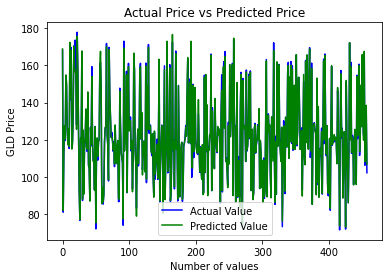

In [29]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()